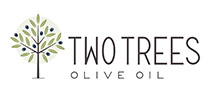

# Two Trees Database

## Order review notebook

This notebook contains SQL scripts for a quick analysis of sales activity. Find out more about the company's products at our [website](https://www.twotreesoliveoil.com/).

### 1. Review the most recent three orders.

In [5]:
SELECT TOP(3) * 
FROM twotrees.sales.orders
ORDER BY orders.order_date DESC;

(3 rows affected)

Total execution time: 00:00:00.009

order_id,order_date,customer_id
120,2020-10-31,BX305
119,2020-10-30,GR208
117,2020-10-29,DF600


---
### 2. Find all the orders from company **Blue Vine** or **Flavorville**
> **Note:** Change the SQL variable to modify the query results!

In [6]:
DECLARE @Company NVARCHAR(50) = 'Blue Vine';

SELECT
    orders.order_id,
    orders.order_date,
    customers.customer_id,
    customers.company,
    customers.address,
    customers.city
FROM twotrees.sales.orders INNER JOIN twotrees.sales.customers
    ON orders.customer_id = customers.customer_id
WHERE customers.company = @Company
ORDER BY order_date DESC;

(4 rows affected)

Total execution time: 00:00:00.012

order_id,order_date,customer_id,company,address,city
115,2020-10-28,BV446,Blue Vine,40675 Raymond Curve,Columbus
112,2020-10-26,BV446,Blue Vine,40675 Raymond Curve,Columbus
102,2020-10-19,BV446,Blue Vine,40675 Raymond Curve,Columbus
103,2020-10-19,BV446,Blue Vine,40675 Raymond Curve,Columbus


---
### 3. Find the products with the most sales.

In [7]:
SELECT DISTINCT
    products.product_name,
    products.size,
    products.price,
    order_lines.sku,
    "total_sold" = sum(order_lines.quantity) 
        OVER (PARTITION BY order_lines.sku)
FROM twotrees.sales.order_lines INNER JOIN twotrees.inventory.products
    ON order_lines.sku = products.sku
ORDER BY "total_sold" DESC

(49 rows affected)

Total execution time: 00:00:00.024

product_name,size,price,sku,total_sold
First Cold Press,8,8.99,FCP008,9
First Cold Press,128,24.99,FCP128,7
Koroneiki,128,26.99,KRN128,7
Picual,16,14.99,PIC016,7
Pure,64,20.99,PUR064,6
Extra Virgin,128,24.99,EV128,5
Frantoio,128,26.99,FR128,5
Refined,8,8.99,REF008,5
Basil-Infused EVO,8,10.99,BI008,4
Extra Virgin,32,16.99,EV032,4
